### 5 Main steps in training ML Algorithm

* Selecting features and collecting training samples
* Choosing a performance metric
* Choosing a classifier and optimization algorithm
* Evaluating the performance of the model
* Tuning the algorithm

### Using SciKit Libraries

##### Importing data

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2, 3]]
y = iris.target
print('Class Labels:', np.unique(y))

Class Labels: [0 1 2]


##### Splitting the data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

# Using such a fixed random_state ensures that our results are reproducible.
# Stratification means that the train_test_split method returns training
# and test subsets that have the same proportions of class labels as the 
# input dataset.

In [4]:
# NumPy's bincount function, which counts the number of occurrences of
# each value in an array
print('Labels counts in y:', np.bincount(y))

Labels counts in y: [50 50 50]


##### Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# fit method - estimated the parameters μ and σ for each feature dimension
# transform method - standardized the data using μ and σ 

##### Training Model

In [6]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1


##### Performance Metric

In [7]:
from sklearn.metrics import accuracy_score

print('Accuracy: %2f' % accuracy_score(y_test, y_pred))
print('Accuracy: %2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.977778
Accuracy: 0.977778


In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx],
                    label=cl, edgecolor='black')
    # highlight test samples
    if test_idx:
    # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

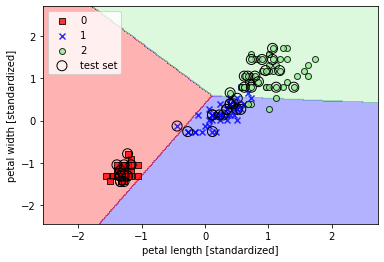

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Maximum margin Classification with SVM

* InSVMs our optimization objective is to maximized misclassification errors.
* Margin : distance betweeen the separating hyperplane (decision boundary) and the training samples that are closes to this hyperplane, which are so-called **support vectors**.

### Maximum margin intuition

* Large margin - tend to have a lower gerneralization error
* small margin - more prone to overfitting
* Consider postive and negative hyperplanes that are // to decision boundary, expressed as follows:

$$w_0 + w^T x_{pos} = 1$$
$$w_0 + w^T x_{neg} = -1$$
$$w^T (x_{pos} - x_{neg}) = 2$$

* Normalize this equation by the length of the vector w

$$||w|| = \sqrt{\sum_{j=1}^{m} w_{j}^{2}}$$
$$\frac{w^T (x_{pos} - x_{neg})}{||w||} = \frac{2}{||w||}$$

* Left side of the equation - distance between the pos and neg hyperplanes, which is so-called **margin** that we want to maximize.

### Nonlinearly separable case using Slack Variables

* Slack variable $\varphi$ - led to **soft-margin classification**
* The motivation for introducing the slack variable $\varphi$ was that the linear constraints need to be relaxed for nonlinearly separable data to allow the convergence of the optimization in the presence of misclassifications, under appropriate cost penalization.

* The postive values slack variables is simply added to the linear constraints:

$$w_o + w^tx^i >= 1 - \varphi^i (if y^i = 1)$$
$$w_o + w^tx^i <= -1 - \varphi^i (if y^i = -1)$$
$$ i = 1...N$$

* New objective to be minimized:

$$\frac{1}{2}||w||^2 + C(\sum_i{\varphi}^i)$$

* Variable C, we can control the penalty for misclassification.
* large values of C - large error penalties 
* small values of C - less strict about the classification errors 
* C parameter - can be used to control the width of margin and tune the bias-variance trade-off

##### Implmentation of SVM model

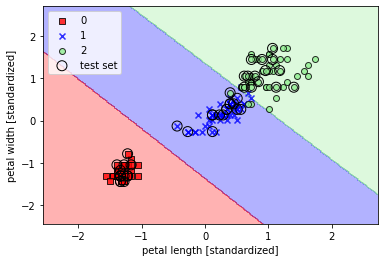

In [12]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

#### LR Vs SVM

* Linear LR and Linear SVM often yield very similar results.
* LR tries to maximize the conditional likelihoods of the training data, where SVM mostly care about the points that are closes to the decision boundary.
* LR - simpler model and can be implemented very easily
* LR - can be easily updated (very attractive when working in streaming data)

#### Alternative implmentation in scikit-learn
* Sometimes our datasets are too large to fir into computer memory. Thi can avoided by **SGDClassifier class**


In [13]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

### Kernel methods for Linearly inseparable data

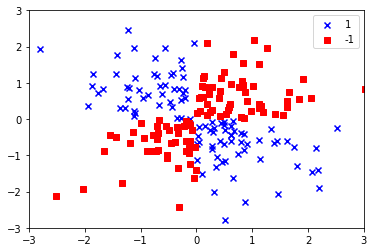

In [14]:
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:, 1]>0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0],X_xor[y_xor == 1, 1],c='b', marker='x',label='1')
plt.scatter(X_xor[y_xor == -1, 0],X_xor[y_xor == -1, 1],c='r',marker='s',label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

 * The basic idea behind kernel methods to deal with such linearly inseparable data is to create nonlinear combinations of the original features to project them onto a higher-dimensional space via a mapping function $\phi$ where it becomes linearly separable.
 
 $$\phi(x_1,x_2) = (z_1,z_2,z_3) = (x_1,x_2,x_1^2 + x_2^2)$$
 
 * We would transform the training data onto a higher-dimensional feature space via a mapping function $\phi$ and train a linear SVM model to classify the data in this new feature space.
 $$$$
 * Then, we can use the same mapping function $\phi$ to transform new, unseen data to classify it using the linear SVM model.
 $$$$
 * **One Problem** - with this mapping approach is that the construction of the new features is computationally very expensive, especially if we are dealing with high-dimensional data.
 $$$$
 * To avoid, kernel-trick comes into play - replacing dot porduct $x^{(i)T}x^{j}$  by  $\phi(x^{(i)})^T \phi(x^{(j)})$
 
 * **Kernel Fucntion** - $K(x^{(i)T}, x^{j}) = \phi(x^{(i)})^T \phi(x^{(j)})$
 $$$$
 * Widely used kernels is **Radial Basis Function(RBF)** kernel or simplay called **Gaussian kernel**
 
    $$K(x^{(i)T}, x^{j}) = exp(-\frac{||x^i - x^j||^2}{2(variance)^2})$$
often simplied to :
    $$K(x^{(i)T}, x^{j}) = exp(-\gamma||x^i - x^j||^2)$$


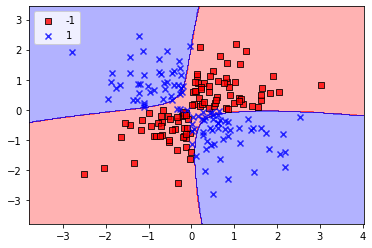

In [18]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

## Higher value of gamma - leads to tigther and bumpier decision boundary

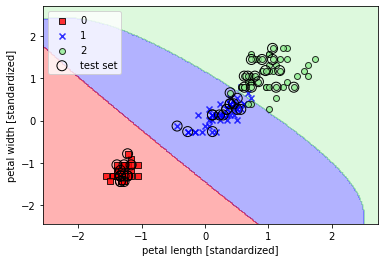

In [19]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined, classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

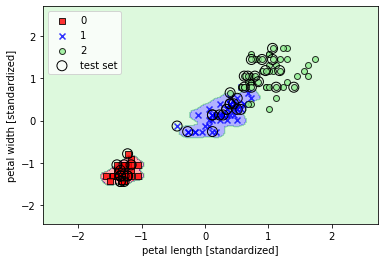

In [20]:
svm = SVC(kernel='rbf', random_state=1, gamma=100, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined, classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

* Although the model fits the training dataset very well, such a classifier will likely have a high generalization error on unseen data.
* This illustrates that the $\gamma$ parameter also plays an important role in controlling overfitting